# 원, 삼각형, 사각형 구분하기 
    - 어려운 테스트 문제를 기존 CNN 모델로 푸는 경우

In [1]:
from google.colab import files
up = files.upload()

Saving hard_handwriting_shape.zip to hard_handwriting_shape.zip


In [2]:
!unzip hard_handwriting_shape.zip -d hard_handwriting_shape > /dev/null

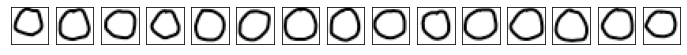

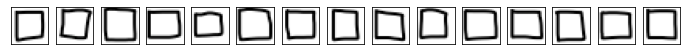

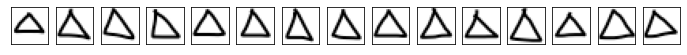

In [3]:
from PIL import Image
import glob
import matplotlib.pyplot as plt

shapes = ['circle', 'rectangle', 'triangle']
for shape in shapes:
    dir_name = f'hard_handwriting_shape/train/{shape}'
    plt.figure(figsize=(12,1))
    for i, fname in enumerate(glob.glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1,15,i+1), plt.imshow(img), plt.xticks([]), plt.yticks([])
    plt.show()

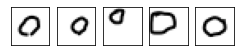

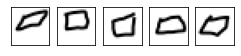

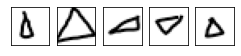

In [4]:
for shape in shapes:
    dir_name = f'hard_handwriting_shape/test/{shape}'
    plt.figure(figsize=(4,1))
    for i, fname in enumerate(glob.glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1,5,i+1), plt.imshow(img), plt.xticks([]), plt.yticks([])
    plt.show()

In [5]:
import cv2
cv2.imread(fname).shape

(24, 24, 3)

- 데이터셋 생성하기

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
train_data_generator = train_datagen.flow_from_directory(
    'hard_handwriting_shape/train',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1/255.)
test_data_generator = test_datagen.flow_from_directory(
    'hard_handwriting_shape/test',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

Found 15 images belonging to 3 classes.


In [8]:
train_data_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [9]:
train_data_generator.filenames[0]

'circle/circle001.png'

- 모델 정의/설정

In [10]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [12]:
model = Sequential([ 
    Conv2D(32, (3,3), input_shape=(24,24,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [13]:
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

- 모델 학습

In [14]:
model.fit(
    train_data_generator,   # 훈련데이터셋을 제공할 제네레이터
    steps_per_epoch=15,     # 한 epoch에 사용한 스텝 수. 총 45개의 훈련 샘플이 있고 배치사이즈가 3이므로 15 스텝으로 지정.
    epochs=50,
    validation_data=test_data_generator,    # 검증데이터셋을 제공할 제네레이터
    validation_steps=5      # 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수
)

Epoch 1/50
15/15 [==============================] - 2s 44ms/step - loss: 0.9464 - accuracy: 0.6444 - val_loss: 1.5220 - val_accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 0s 24ms/step - loss: 0.2464 - accuracy: 0.9333 - val_loss: 3.6042 - val_accuracy: 0.3333
Epoch 3/50
15/15 [==============================] - 0s 30ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 4.6804 - val_accuracy: 0.3333
Epoch 4/50
15/15 [==============================] - 0s 28ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 5.3487 - val_accuracy: 0.3333
Epoch 5/50
15/15 [==============================] - 0s 26ms/step - loss: 7.2401e-04 - accuracy: 1.0000 - val_loss: 5.6233 - val_accuracy: 0.3333
Epoch 6/50
15/15 [==============================] - 0s 29ms/step - loss: 4.4692e-04 - accuracy: 1.0000 - val_loss: 5.7817 - val_accuracy: 0.3333
Epoch 7/50
15/15 [==============================] - 0s 30ms/step - loss: 3.6152e-04 - accuracy: 1.0000 - val_loss: 5.8996 - val_accuracy: 0.3333
E

- 모델 평가

In [16]:
model.evaluate(test_data_generator, steps=5)
# 어떤 해석이??
# 5/5 [==============================] - 0s 6ms/step - loss: 0.0034 - accuracy: 1.0000
# [0.0033818951342254877, 1.0] ver1. 
# 5/5 [==============================] - 0s 8ms/step - loss: 9.7794 - accuracy: 0.3333
# [9.77936840057373, 0.3333333432674408] ver2 hard

5/5 [==============================] - 0s 8ms/step - loss: 9.7794 - accuracy: 0.3333


[9.77936840057373, 0.3333333432674408]

In [17]:
model.evaluate(test_data_generator)
# 무슨 차이를 둔것인가?

5/5 [==============================] - 0s 7ms/step - loss: 9.7794 - accuracy: 0.3333


[9.77936840057373, 0.3333333432674408]